In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

import math
import random

import warnings
warnings.filterwarnings('ignore')

import pyspark
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession.builder.master("local").appName("customer_churn").enableHiveSupport().getOrCreate()

os.getcwd()

'C:\\Users\\LOTTE\\Desktop'

In [4]:
path = 'C:\\Users\\LOTTE\\Desktop'
os.chdir(path)
os.getcwd()

'C:\\Users\\LOTTE\\Desktop'

In [7]:
df_spk = spark.read.csv(r"C:\\Users\\LOTTE\\Desktop\\telecom_churn.csv", header=True)
df_spk.cache()
df_spk.show(5)

+-----+------------+---------------+--------+---------+-------------+-------+--------+-------------+----------+--------+
|Churn|AccountWeeks|ContractRenewal|DataPlan|DataUsage|CustServCalls|DayMins|DayCalls|MonthlyCharge|OverageFee|RoamMins|
+-----+------------+---------------+--------+---------+-------------+-------+--------+-------------+----------+--------+
|    0|         128|              1|       1|      2.7|            1|  265.1|     110|           89|      9.87|      10|
|    0|         107|              1|       1|      3.7|            1|  161.6|     123|           82|      9.78|    13.7|
|    0|         137|              1|       0|        0|            0|  243.4|     114|           52|      6.06|    12.2|
|    0|          84|              0|       0|        0|            2|  299.4|      71|           57|       3.1|     6.6|
|    0|          75|              0|       0|        0|            3|  166.7|     113|           41|      7.42|    10.1|
+-----+------------+------------

In [10]:
df = pd.read_csv(r"C:\\Users\\LOTTE\\Desktop\\telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Checklist
1. Datatype
2. Null data
3. Outliers
4. parameter tuning if necessary
5. Scaling, Encoding

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


The dataset is consisted of 3333 rows and 11 columns, having no null data, its datatype is integer or float for all columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


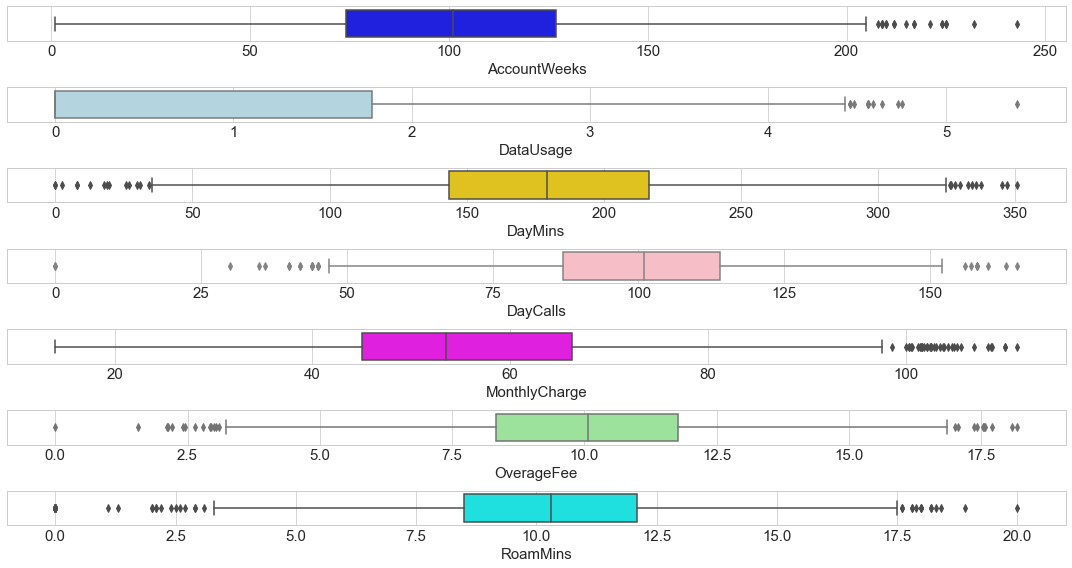

In [27]:
plt.style.use('seaborn-whitegrid')
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 8))
sns.boxplot(x='AccountWeeks', data=df, color='blue', ax=ax[0])
sns.boxplot(x='DataUsage', data=df, color='lightblue', ax=ax[1])
sns.boxplot(x='DayMins', data=df, color='gold', ax=ax[2])
sns.boxplot(x='DayCalls', data=df, color='lightpink', ax=ax[3])
sns.boxplot(x='MonthlyCharge', data=df, color='magenta', ax=ax[4])
sns.boxplot(x='OverageFee', data=df, color='lightgreen', ax=ax[5])
sns.boxplot(x='RoamMins', data=df, color='cyan', ax=ax[6])

plt.tight_layout()
plt.show()

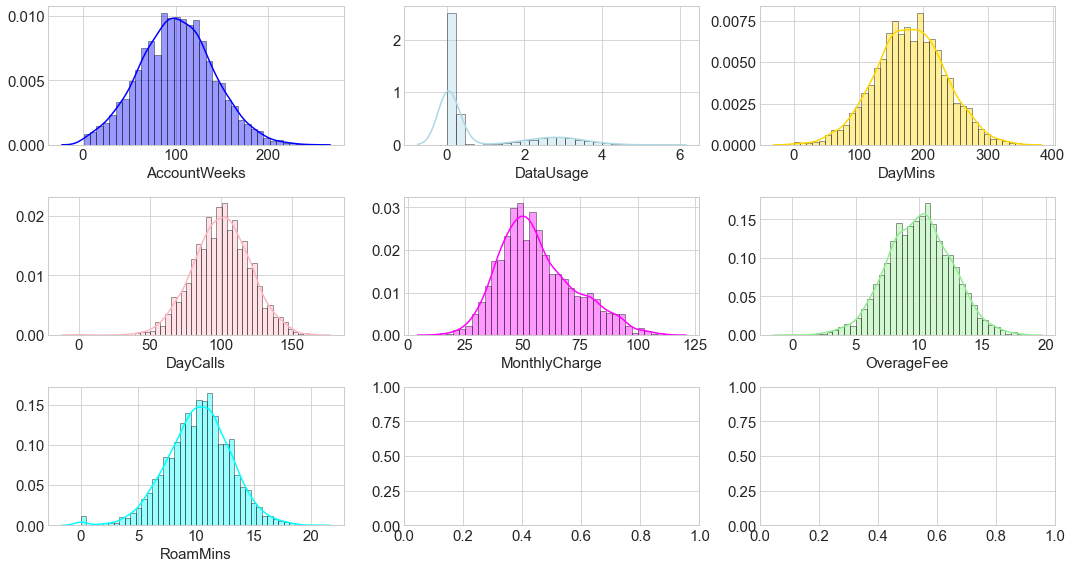

In [34]:
plt.style.use('seaborn-whitegrid')
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
sns.distplot(df['AccountWeeks'], color='blue', hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[0][0])
sns.distplot(df['DataUsage'], color='lightblue', hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[0][1])
sns.distplot(df['DayMins'], color='gold',hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[0][2])
sns.distplot(df['DayCalls'], color='lightpink',hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[1][0])
sns.distplot(df['MonthlyCharge'], color='magenta',hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[1][1])
sns.distplot(df['OverageFee'], color='lightgreen',hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[1][2])
sns.distplot(df['RoamMins'], color='cyan',hist_kws=dict(edgecolor='black', linewidth=1), ax=ax[2][0])

plt.tight_layout()
plt.show()

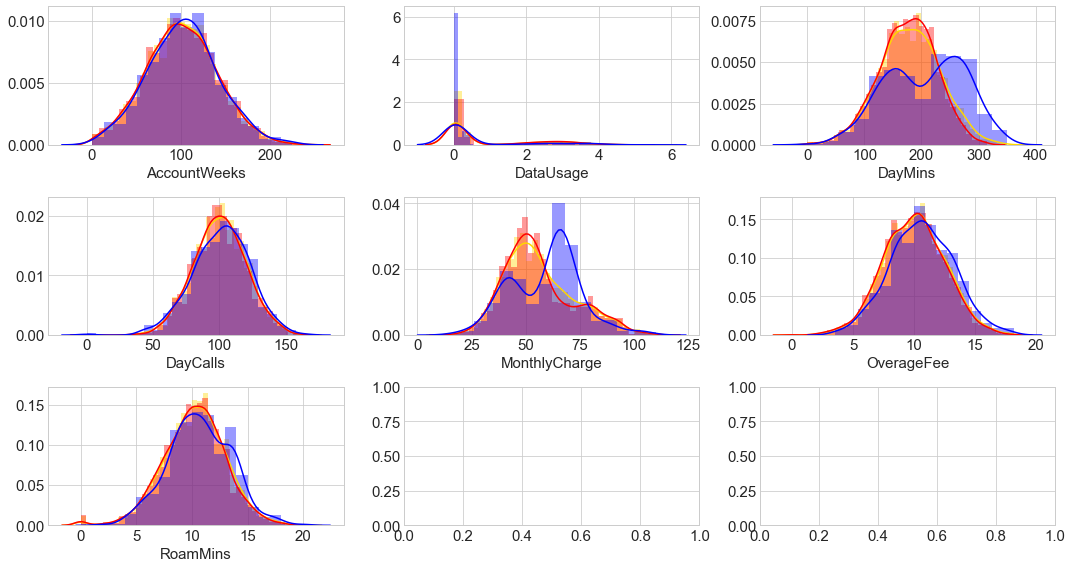

In [118]:
plt.style.use('seaborn-whitegrid')
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

sns.distplot(df['AccountWeeks'], color='gold', ax=ax[0][0])
sns.distplot(df[df['Churn'] == 0]['AccountWeeks'], color='red', ax=ax[0][0])
sns.distplot(df[df['Churn'] == 1]['AccountWeeks'], color='blue', ax=ax[0][0])

sns.distplot(df['DataUsage'], color='gold', ax=ax[0][1])
sns.distplot(df[df['Churn'] == 0]['DataUsage'], color='red', ax=ax[0][1])
sns.distplot(df[df['Churn'] == 1]['DataUsage'], color='blue', ax=ax[0][1])

sns.distplot(df['DayMins'], color='gold', ax=ax[0][2])
sns.distplot(df[df['Churn'] == 0]['DayMins'], color='red', ax=ax[0][2])
sns.distplot(df[df['Churn'] == 1]['DayMins'], color='blue', ax=ax[0][2])

sns.distplot(df['DayCalls'], color='gold', ax=ax[1][0])
sns.distplot(df[df['Churn'] == 0]['DayCalls'], color='red', ax=ax[1][0])
sns.distplot(df[df['Churn'] == 1]['DayCalls'], color='blue', ax=ax[1][0])

sns.distplot(df['MonthlyCharge'], color='gold', ax=ax[1][1])
sns.distplot(df[df['Churn'] == 0]['MonthlyCharge'], color='red', ax=ax[1][1])
sns.distplot(df[df['Churn'] == 1]['MonthlyCharge'], color='blue', ax=ax[1][1])

sns.distplot(df['OverageFee'], color='gold', ax=ax[1][2])
sns.distplot(df[df['Churn'] == 0]['OverageFee'], color='red', ax=ax[1][2])
sns.distplot(df[df['Churn'] == 1]['OverageFee'], color='blue', ax=ax[1][2])

sns.distplot(df['RoamMins'], color='gold', ax=ax[2][0])
sns.distplot(df[df['Churn'] == 0]['RoamMins'], color='red', ax=ax[2][0])
sns.distplot(df[df['Churn'] == 1]['RoamMins'], color='blue', ax=ax[2][0])

plt.tight_layout()
plt.show()


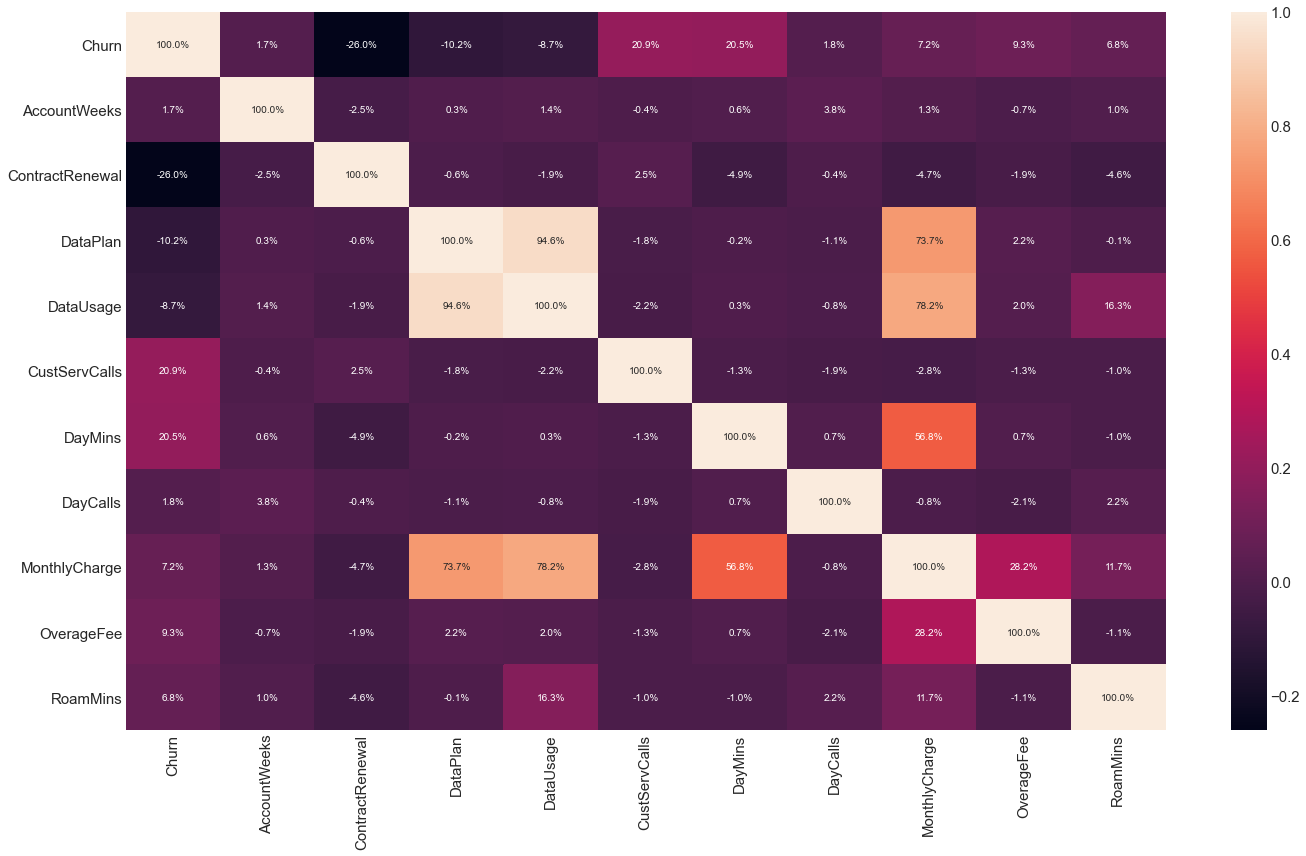

In [119]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt='.1%')
plt.tight_layout()

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


#### Develop Models in those following conditions: 
1. Before Data scaling
2. After Data scaling

In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [53]:
feature = df.drop(['Churn'], axis=1)
label = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, stratify=label)

In [54]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2666
667
2666
667


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report, confusion_matrix

In [134]:
dct = DecisionTreeClassifier(min_samples_leaf=30)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [135]:
dct.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [136]:
pred_proba_dct = dct.predict_proba(X_test)
pred_proba_rfc = rfc.predict_proba(X_test)
pred_proba_gbc = gbc.predict_proba(X_test)
pred_proba_xgb = xgb.predict_proba(X_test)
pred_proba_lgbm = lgbm.predict_proba(X_test)

pred_proba_num_dct = pred_proba_dct[:,1]
pred_proba_num_rfc = pred_proba_rfc[:,1]
pred_proba_num_gbc = pred_proba_gbc[:,1]
pred_proba_num_xgb = pred_proba_xgb[:,1]
pred_proba_num_lgbm = pred_proba_lgbm[:,1]

pred_dct = dct.predict(X_test)
pred_rfc = rfc.predict(X_test)
pred_gbc = gbc.predict(X_test)
pred_xgb = xgb.predict(X_test)
pred_lgbm = lgbm.predict(X_test)

In [141]:
model_list = [pred_dct, pred_rfc, pred_gbc, pred_xgb, pred_lgbm]
model_name = ['Decision Tree', 'Random Forest', 'Gradient Boost', 'XG Boost', 'Light GBM']

for model, name in zip(model_list, model_name):
    print('='*50)
    print(f"Model: {name}")
    print('='*50)
    print("** Metrics **")
    print(f"Accuracy:\t {accuracy_score(y_test, model):.4f}")
    print(f"Precision:\t {precision_score(y_test, model):.4f}")
    print(f"Recall:\t\t {recall_score(y_test, model):.4f}")
    print(f"F1:\t\t {f1_score(y_test, model):.4f}")
    print(' ')
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, model))
    print(' ')
    print("** Classification Report **")
    print(classification_report(y_test, model))
    
Accuracy:	 0.9340
Precision:	 0.8046
Recall:		 0.7216
F1:		 0.7609

Model: Decision Tree
** Metrics **
Accuracy:	 0.9295
Precision:	 0.8125
Recall:		 0.6701
F1:		 0.7345
 
** Confusion Matrix **
[[555  15]
 [ 32  65]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.67      0.73        97

    accuracy                           0.93       667
   macro avg       0.88      0.82      0.85       667
weighted avg       0.93      0.93      0.93       667

Model: Random Forest
** Metrics **
Accuracy:	 0.9430
Precision:	 0.8642
Recall:		 0.7216
F1:		 0.7865
 
** Confusion Matrix **
[[559  11]
 [ 27  70]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.86      0.72      0.79        97

    accuracy                           0.94       667
   macro avg       0.91      0.85      0.88       667
weighted avg       0.94      0.94      0.

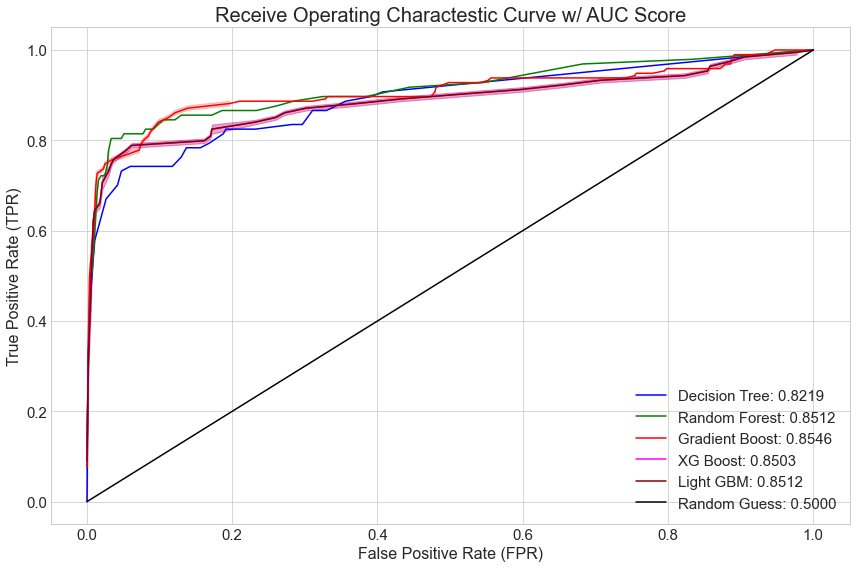

In [140]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

fpr_dct, tpr_dct, threshold = roc_curve(y_test, pred_proba_num_dct)
fpr_rfc, tpr_rfc, threshold = roc_curve(y_test, pred_proba_num_rfc)
fpr_gbc, tpr_gbc, threshold = roc_curve(y_test, pred_proba_num_gbc)
fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, pred_proba_num_xgb)
fpr_lgbm, tpr_lgbm, threshold = roc_curve(y_test, pred_proba_num_lgbm)

sns.lineplot(x=fpr_dct, y=tpr_dct, color='blue', ax=ax, label=f'Decision Tree: {roc_auc_score(y_test, pred_dct):.4f}')
sns.lineplot(x=fpr_rfc, y=tpr_rfc, color='green', ax=ax, label=f'Random Forest: {roc_auc_score(y_test, pred_rfc):.4f}')
sns.lineplot(x=fpr_gbc, y=tpr_gbc, color='red', ax=ax, label=f'Gradient Boost: {roc_auc_score(y_test, pred_gbc):.4f}')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, color='magenta', ax=ax, label=f'XG Boost: {roc_auc_score(y_test, pred_xgb):.4f}')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, color='maroon', ax=ax, label=f'Light GBM: {roc_auc_score(y_test, pred_lgbm):.4f}')
sns.lineplot([0,1], [0,1], color='black', ax=ax, label='Random Guess: 0.5000')

ax.set_title("Receive Operating Charactestic Curve w/ AUC Score", fontsize=20)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

ax.legend(loc=4, fontsize=15)
plt.tight_layout()
plt.show()

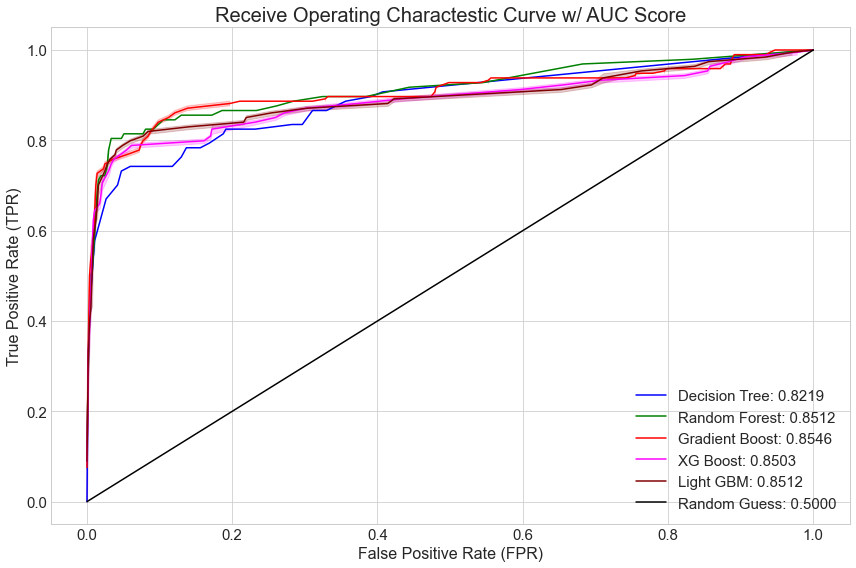

In [144]:
plt.style.use("seaborn-whitegrid")

model_fpr = [fpr_dct, fpr_rfc, fpr_gbc, fpr_xgb, fpr_lgbm]
model_tpr = [tpr_dct, tpr_rfc, tpr_gbc, tpr_xgb, tpr_lgbm]
pred_proba_num = [pred_proba_num_dct, pred_proba_num_rfc, pred_proba_num_gbc, pred_proba_num_xgb, pred_proba_num_lgbm]
model_list = [pred_dct, pred_rfc, pred_gbc, pred_xgb, pred_lgbm]
model_name = ['Decision Tree', 'Random Forest', 'Gradient Boost', 'XG Boost', 'Light GBM']
graph_color = ['blue', 'green', 'red', 'magenta', 'maroon']
pred_list = [pred_dct, pred_rfc, pred_gbc, pred_xgb, pred_lgbm]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for fpr, tpr, pred_proba, li, name, color, pred in zip(model_fpr, model_tpr, pred_proba_num, model_list, model_name, graph_color, pred_list):
    fpr, tpr, threshold = roc_curve(y_test, pred_proba)    
    sns.lineplot(x=fpr, y=tpr, color=color, ax=ax, label=f'{name}: {roc_auc_score(y_test, pred):.4f}')

sns.lineplot([0,1], [0,1], color='black', ax=ax, label='Random Guess: 0.5000')

ax.set_title("Receive Operating Charactestic Curve w/ AUC Score", fontsize=20)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

ax.legend(loc=4, fontsize=15)
plt.tight_layout()
plt.show()

In [146]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [149]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'criterion': ['gini'],
              'max_depth': [9],
              'n_estimators': [600],
              'n_jobs': [-1],
              'max_leaf_nodes': [None],
              'max_samples': [None],
             }
 
randsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=30, cv=5, scoring='accuracy', refit=True)
randsearch.fit(X_train, y_train)

print(f'best parameters: {randsearch.best_params_}')
print(f'best score: {randsearch.best_score_}')

C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\joblib\externals\loky\process_executor.py", line 418, in _process_worker
    r = call_item()
  File "C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\joblib\externals\loky\process_executor.py", line 272, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\joblib\_parallel_backends.py", line 608, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\joblib\parallel.py", line 256, in __call__
    for func, args, kwargs in self.items]
  File "C:\Users\LOTTE\anaconda

best parameters: {'n_jobs': -1, 'n_estimators': 600, 'max_samples': None, 'max_leaf_nodes': None, 'max_depth': 9, 'criterion': 'gini'}
best score: 0.9354863643709901


In [151]:
rfc_new = RandomForestClassifier(n_jobs=-1, n_estimators=600, max_samples=None, max_leaf_nodes=None, max_depth=9, criterion='gini')
rfc_new.fit(X_train, y_train)

pred_proba_rfc_new = rfc_new.predict_proba(X_test)
pred_proba_num_rfc_new = pred_proba_rfc_new[:,1]
pred_rfc_new = rfc_new.predict(X_test)

In [152]:
print(f"Accuracy:\t {accuracy_score(y_test, pred_rfc_new):.4f}")
print(f"Precision:\t {precision_score(y_test, pred_rfc_new):.4f}")
print(f"Recall:\t\t {recall_score(y_test, pred_rfc_new):.4f}")
print(f"F1:\t\t {f1_score(y_test, pred_rfc_new):.4f}")
print(' ')
print("** Confusion Matrix **")
print(confusion_matrix(y_test, pred_rfc_new))
print(' ')
print("** Classification Report **")
print(classification_report(y_test, pred_rfc_new))

Accuracy:	 0.9445
Precision:	 0.8750
Recall:		 0.7216
F1:		 0.7910
 
** Confusion Matrix **
[[560  10]
 [ 27  70]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.88      0.72      0.79        97

    accuracy                           0.94       667
   macro avg       0.91      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667



In [153]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [155]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'learning_rate': [0.1],
              'max_depth': [5],
              'n_estimators': [100],
              'subsample': [1.0],
              'warm_start': [False]
             }
 
randsearch = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=30, cv=5, scoring='accuracy', refit=True)
randsearch.fit(X_train, y_train)

print(f'best parameters: {randsearch.best_params_}')
print(f'best score: {randsearch.best_score_}')

best parameters: {'warm_start': False, 'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
best score: 0.9302323783825563


In [172]:
gbc_new = GradientBoostingClassifier(warm_start=False, subsample=1.0, n_estimators=100, max_depth=5, learning_rate=0.1)
gbc_new.fit(X_train, y_train)

pred_proba_gbc_new = gbc_new.predict_proba(X_test)
pred_proba_num_gbc_new = pred_proba_gbc_new[:,1]
pred_gbc_new = gbc_new.predict(X_test)

print(f"Accuracy:\t {accuracy_score(y_test, pred_gbc_new):.4f}")
print(f"Precision:\t {precision_score(y_test, pred_gbc_new):.4f}")
print(f"Recall:\t\t {recall_score(y_test, pred_gbc_new):.4f}")
print(f"F1:\t\t {f1_score(y_test, pred_gbc_new):.4f}")
print(' ')
print("** Confusion Matrix **")
print(confusion_matrix(y_test, pred_gbc_new))
print(' ')
print("** Classification Report **")
print(classification_report(y_test, pred_gbc_new))

Accuracy:	 0.9355
Precision:	 0.8140
Recall:		 0.7216
F1:		 0.7650
 
** Confusion Matrix **
[[554  16]
 [ 27  70]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.72      0.77        97

    accuracy                           0.94       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.93      0.94      0.93       667



In [157]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [158]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'boosting_type': ['gbdt'],
              'class_weight': [None],
              'colsample_bytree': [1.0],
              'importance_type': ['split'],
              'learning_rate': [0.1, 0.3, 0.5, 0.7],
              'max_depth': [1, 3, 5, 7],
              'min_child_samples': [20, 25 ,30],
              'min_child_weight': [0.001],
              'min_split_gain': [0.0],
              'n_estimators': [100, 300, 500],
              'n_jobs': [-1],
              'num_leaves': [20, 25, 30, 35],
              'reg_alpha': [0.0],
              'reg_lambda': [0.0],
              'subsample': [1.0],
              'subsample_for_bin': [200000],
              }
 
randsearch = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', refit=True)
randsearch.fit(X_train, y_train)

print(f'best parameters: {randsearch.best_params_}')
print(f'best score: {randsearch.best_score_}')

[17:25:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "boosting_type", "min_child_samples", "min_split_gain", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "boosting_type", "min_child_samples", "min_split_gain", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:4

In [173]:
gbc_new = GradientBoostingClassifier(subsample_for_bin=200000, subsample=1.0, reg_lambda=0.0, reg_alpha=0.0, num_leaves=25, n_jobs=-1, n_estimators=100, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=25, max_depth=3, learning_rate=0.1, importance_type='split', colsample_bytree=1.0, class_weight=None, boosting_type='gbdt')

pred_proba_gbc_new = gbc_new.predict_proba(X_test)
pred_proba_num_gbc_new = pred_proba_gbc_new[:,1]
pred_gbc_new = gbc_new.predict(X_test)

print(f"Accuracy:\t {accuracy_score(y_test, pred_gbc_new):.4f}")
print(f"Precision:\t {precision_score(y_test, pred_gbc_new):.4f}")
print(f"Recall:\t\t {recall_score(y_test, pred_gbc_new):.4f}")
print(f"F1:\t\t {f1_score(y_test, pred_gbc_new):.4f}")
print(' ')
print("** Confusion Matrix **")
print(confusion_matrix(y_test, pred_gbc_new))
print(' ')
print("** Classification Report **")
print(classification_report(y_test, pred_gbc_new))

TypeError: __init__() got an unexpected keyword argument 'subsample_for_bin'